In [ ]:
#Colleen Karnas-Haines
#3/26/2018
#Equator Data
#Added an extra scatter-geo map
#Also added some nice colors to help visualize the data
#I chose to use take the absolute latitude degrees to truly show distance from the equator as opposed to position on the globe

#Observations
# 1. As suspected, cities near the equator have higher noontime temperatures than cities far away from the equator.
#It should be noted though, that there is a lack of cities in the southern hemishpere, so seraching by city creates
#a surge of cities at the southern tip of South America and Africa, whereas North America and Europe's sampled cities can be
#more spread out
# 2. At various times I noticed a more prominent trend in wind speed--the wind speed would increase
#as the distance from the equator increased. The current data reading are less pronouced, particularly midway between the 
#equator and the poles.
# 3. There is less variation in the temperatures around the equator. If you look at the temperatures at -30 to 30 degrees latitude
#there is between 40 to 50 degree difference in temperature. However, 60-90 and -60 to -90 degrees latitude
#both see temperatures with a 75 to 85 degree range.

In [1]:
from config import api_key
import random
import pandas as pd
import numpy as np
from citipy import citipy
from pprint import pprint
import requests
import matplotlib.pyplot as plt
#https://openweathermapy.readthedocs.io/en/latest/
import openweathermapy.core as owm

In [2]:
#define blocks so that we have an equal representation across the globe

#Five lng ranges hit too many oceans and I could not find enough *unique* cities in a timely fashion
#lat_ranges={"A":(-90,-45),"B":(-44,0),"C":(1,45),"D":(46,90)}
#lng_ranges={"a":(-180,-108),"b":(-107,-36),"c":(-35,36),"d":(37,108),"e":(109,180)}

#Three lng ranges gives us more options to find cities
lng_ranges={"a":(-180,-61),"b":(-60,60),"c":(61,180)}
lat_ranges={"A":(-90,-31),"B":(-30,30),"C":(31,90)}

In [3]:
#create data frame
loc_dict={}
locations = pd.DataFrame(columns=["latitude","longitude","Nearest City","Country Code","Noon Temp(f)",
                                  "Humidity","Clouds","Wind Speed","Distance From Equator"])

In [4]:
#We have 9 lat/lng combinations which does not go evenly into 500, so we will get 504
#####
#####
#Replace with 56
#####
#####
for i in range(56):
    for lat_loc in lat_ranges:
        for lng_loc in lng_ranges:
            duplicate=True
            while duplicate:          
                lat=random.uniform(*lat_ranges[lat_loc])
                lng=random.uniform(*lng_ranges[lng_loc])
                city=citipy.nearest_city(lat,lng)
                c_name=city.city_name 
                country=city.country_code
                loc_dict={"latitude":lat,"longitude":lng,"Nearest City":c_name,"Country Code":country}
                if c_name not in locations["Nearest City"].values:
                    locations=locations.append(loc_dict, ignore_index=True)
                    duplicate=False
                    
             
            
locations.head()                

,latitude,longitude,Nearest City,Country Code,Noon Temp(f),Humidity,Clouds,Wind Speed,Distance From Equator
0,-33.381618,-170.591883,vaini,to,NaN,NaN,NaN,NaN,NaN
1,-45.713471,-12.066371,jamestown,sh,NaN,NaN,NaN,NaN,NaN
2,-62.270670,116.297216,albany,au,NaN,NaN,NaN,NaN,NaN
3,-10.734625,-93.916516,puerto ayora,ec,NaN,NaN,NaN,NaN,NaN
4,25.107179,34.769792,safaga,eg,NaN,NaN,NaN,NaN,NaN


In [5]:
#Since we have 4 extra cities, we randomly drop 4 of them
#Reread insruction, we need *at least* 500
#to_drop=[random.randint(0,(len(locations)-1)) for i in range(4)]
#for i in to_drop:
#    locations=locations.drop(i)
#locations=locations.reset_index(drop=True)

In [6]:
base_url="http://api.openweathermap.org/data/2.5/forecast?appid="+api_key+"&q="
units="&units=imperial"


In [7]:

for row in range(len(locations)):
    print("Processing record #"+str(row)+" | "+locations.iloc[row,2])
    url="http://api.openweathermap.org/data/2.5/forecast?appid="+api_key+"&lat="+str(int(locations.iloc[row][0]))+"&lon="+str(int(locations.iloc[row][1]))+units
    response=requests.get(url,"Error").json()
    print(url)
    
    #I had this code because osme of the cities were unknown to the weather api, but the lat/long were always good.
    #I decided just to use lat/long exclusively.
    
    #response=requests.get(base_url+locations.iloc[row][2]+","+locations.iloc[row][3]+units).json()
    #if response["cod"]=="404":
    #    response=requests.get("http://api.openweathermap.org/data/2.5/forecast?appid="+api_key+
    #                          "&lat="+str(int(locations.iloc[row][0]))+"&lon="+str(int(locations.iloc[row][1]))+units).json() 
    #    print("http://api.openweathermap.org/data/2.5/forecast?appid="+api_key+
    #                          "&lat="+str(int(locations.iloc[row][0]))+"&lon="+str(int(locations.iloc[row][1]))+units)
    #else:
    #    print(base_url+locations.iloc[row][2]+","+locations.iloc[row][3]+units)

    #The weather forecast is every 3 hours: 0,6am,9am,12pm. So the [4] gives us the noon temperature
    locations.iloc[row,4]=response["list"][4]["main"]["temp_max"]
    locations.iloc[row,5]=response["list"][4]["main"]["humidity"]
    locations.iloc[row,6]=response["list"][4]["clouds"]["all"]
    locations.iloc[row,7]=response["list"][4]["wind"]["speed"]




Processing record #0 | vaini
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-33&lon=-170&units=imperial
Processing record #1 | jamestown
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-45&lon=-12&units=imperial
Processing record #2 | albany
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-62&lon=116&units=imperial
Processing record #3 | puerto ayora
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-10&lon=-93&units=imperial
Processing record #4 | safaga
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=25&lon=34&units=imperial
Processing record #5 | samarai
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-11&lon=150&units=imperial
Processing record #6 | qaanaaq
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a

http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-33&lon=-156&units=imperial
Processing record #55 | tsihombe
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-37&lon=43&units=imperial
Processing record #56 | saint-philippe
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-60&lon=67&units=imperial
Processing record #57 | freeport
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=26&lon=-78&units=imperial
Processing record #58 | ponta do sol
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=20&lon=-31&units=imperial
Processing record #59 | kununurra
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-19&lon=126&units=imperial
Processing record #60 | yarmouth
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799

http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-34&lon=4&units=imperial
Processing record #110 | mahebourg
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-41&lon=71&units=imperial
Processing record #111 | villagarzon
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=0&lon=-76&units=imperial
Processing record #112 | takoradi
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=0&lon=-1&units=imperial
Processing record #113 | kupang
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-10&lon=123&units=imperial
Processing record #114 | kapaa
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=33&lon=-168&units=imperial
Processing record #115 | milazzo
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=38&lon=

http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-35&lon=-47&units=imperial
Processing record #164 | port lincoln
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-35&lon=136&units=imperial
Processing record #165 | fare
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-15&lon=-149&units=imperial
Processing record #166 | bonthe
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=3&lon=-15&units=imperial
Processing record #167 | kaeo
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-28&lon=176&units=imperial
Processing record #168 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=85&lon=-128&units=imperial
Processing record #169 | talah
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=35&l

http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-35&lon=38&units=imperial
Processing record #218 | burnie
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-43&lon=141&units=imperial
Processing record #219 | tayoltita
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=24&lon=-105&units=imperial
Processing record #220 | bassila
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=8&lon=1&units=imperial
Processing record #221 | airai
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=12&lon=142&units=imperial
Processing record #222 | smithers
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=57&lon=-127&units=imperial
Processing record #223 | larsnes
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=64&lon=4&

http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-43&lon=172&units=imperial
Processing record #273 | faanui
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-12&lon=-154&units=imperial
Processing record #274 | inhapim
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-19&lon=-41&units=imperial
Processing record #275 | hithadhoo
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-2&lon=76&units=imperial
Processing record #276 | narsaq
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=80&lon=-62&units=imperial
Processing record #277 | qasigiannguit
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=67&lon=-48&units=imperial
Processing record #278 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a

http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-41&lon=156&units=imperial
Processing record #327 | acevedo
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=1&lon=-75&units=imperial
Processing record #328 | farafangana
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-22&lon=47&units=imperial
Processing record #329 | mata
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=21&lon=111&units=imperial
Processing record #330 | bethel
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=53&lon=-159&units=imperial
Processing record #331 | sarno
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=40&lon=14&units=imperial
Processing record #332 | gulshat
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=45&lon=74&u

http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-34&lon=152&units=imperial
Processing record #381 | acapulco
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=3&lon=-105&units=imperial
Processing record #382 | bathsheba
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=14&lon=-52&units=imperial
Processing record #383 | ojhar
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=20&lon=74&units=imperial
Processing record #384 | saint george
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=31&lon=-61&units=imperial
Processing record #385 | snina
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=49&lon=22&units=imperial
Processing record #386 | sentyabrskiy
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=4

http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-14&lon=-84&units=imperial
Processing record #436 | victoria
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-5&lon=53&units=imperial
Processing record #437 | qui nhon
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=14&lon=112&units=imperial
Processing record #438 | la ronge
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=55&lon=-105&units=imperial
Processing record #439 | tasiilaq
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=57&lon=-36&units=imperial
Processing record #440 | udachnyy
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=67&lon=111&units=imperial
Processing record #441 | bell ville
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=

http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=7&lon=42&units=imperial
Processing record #491 | hue
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=15&lon=107&units=imperial
Processing record #492 | palmer
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=56&lon=-144&units=imperial
Processing record #493 | sidi ali
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=35&lon=1&units=imperial
Processing record #494 | gazli
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=41&lon=62&units=imperial
Processing record #495 | la union
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-40&lon=-73&units=imperial
Processing record #496 | tacuarembo
http://api.openweathermap.org/data/2.5/forecast?appid=74bf24768501a41ba7a1d66c2054a799&lat=-32&lon=-56&un

In [8]:
#The pdf examples had x-axes from -90 to 90, however, in reading the literature about the assignment, the question really asked
#about distance from equator, not placement on globe. Therefore, I did an extra step where I grabbed the absolute value
#of the latitude. This makes the graph look a bit different, but truly evaluates distance from equator vs. placement on globe
for i in range(len(locations)):
    locations.iloc[i,8]=abs(int(locations.iloc[i][0]))
#print(str(abs(int(locations.iloc[0][0]))))
#locations.head()

In [9]:

locations=locations.sort_values(by=["Distance From Equator"])
locations.to_csv("EquatorDataResults.csv")
locations.head()

,latitude,longitude,Nearest City,Country Code,Noon Temp(f),Humidity,Clouds,Wind Speed,Distance From Equator
310,-0.138592,-59.460006,urucara,br,86.60,64.0,36.0,3.27,0.0
302,0.082734,116.045241,loa janan,id,74.90,94.0,44.0,0.69,0.0
111,0.950577,-76.769581,villagarzon,co,79.76,85.0,68.0,2.93,0.0
112,-0.869655,-1.592478,takoradi,gh,83.27,100.0,8.0,7.74,0.0
85,-0.404012,17.992314,mbandaka,cd,78.86,83.0,92.0,2.93,0.0


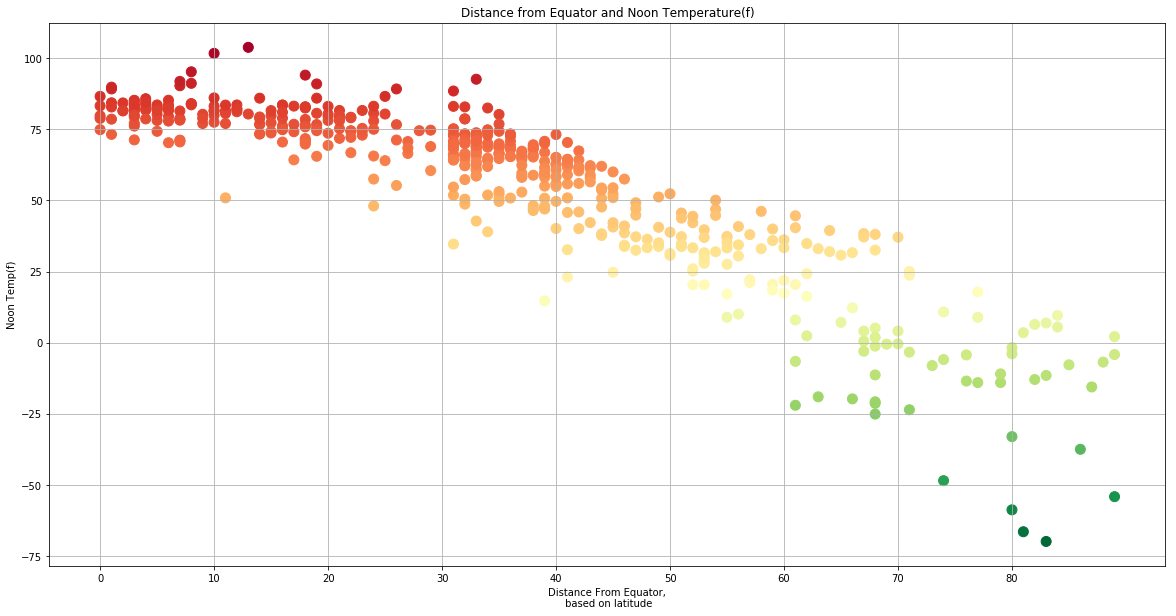

In [33]:
# Create a scatter plot that looks at temp according to distance from equator. The colormap helps the eye understand, intuitively,
#what the data is saying. Red=hot!
locations.plot(kind="scatter", x="Distance From Equator", y="Noon Temp(f)", grid=True, figsize=(20,10),
               title="Distance from Equator and Noon Temperature(f)",s=100,c="Noon Temp(f)", cmap="RdYlGn_r",
               xticks=np.arange(0,90,10), colorbar=False)

plt.xlabel('Distance From Equator,\n based on latitude')
plt.savefig('Temperature.png')
plt.show()

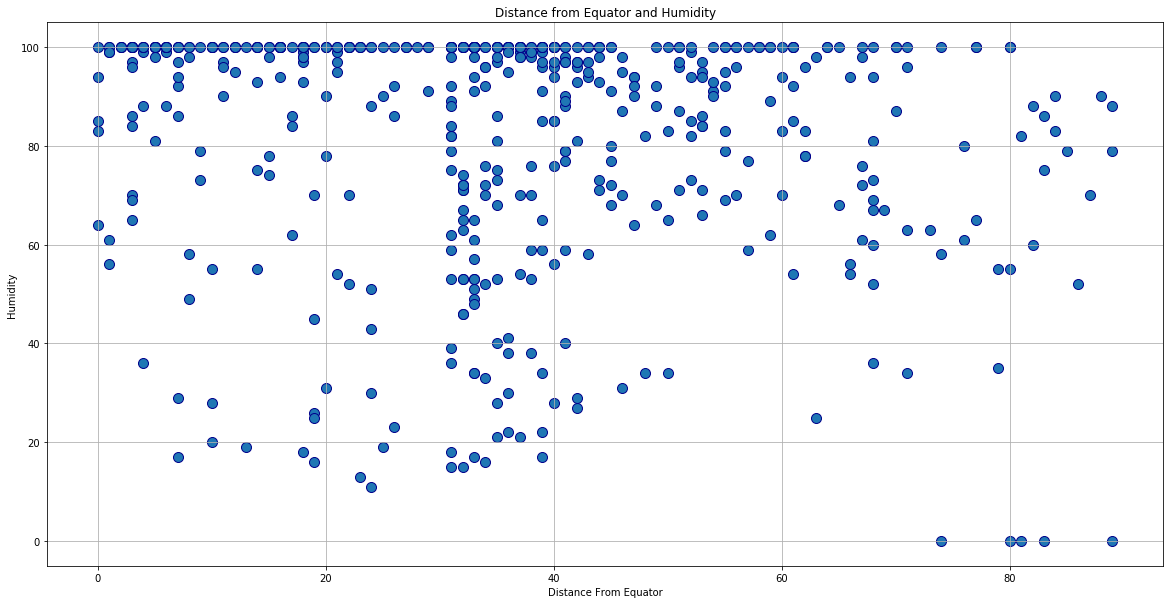

In [34]:
#Scatter plot with distance from equator v. humidty
locations.plot(kind="scatter", x="Distance From Equator", y="Humidity", grid=True, figsize=(20,10),
              title="Distance from Equator and Humidity",s=100, edgecolor="darkblue")
plt.savefig('Humidity.png')
plt.show()

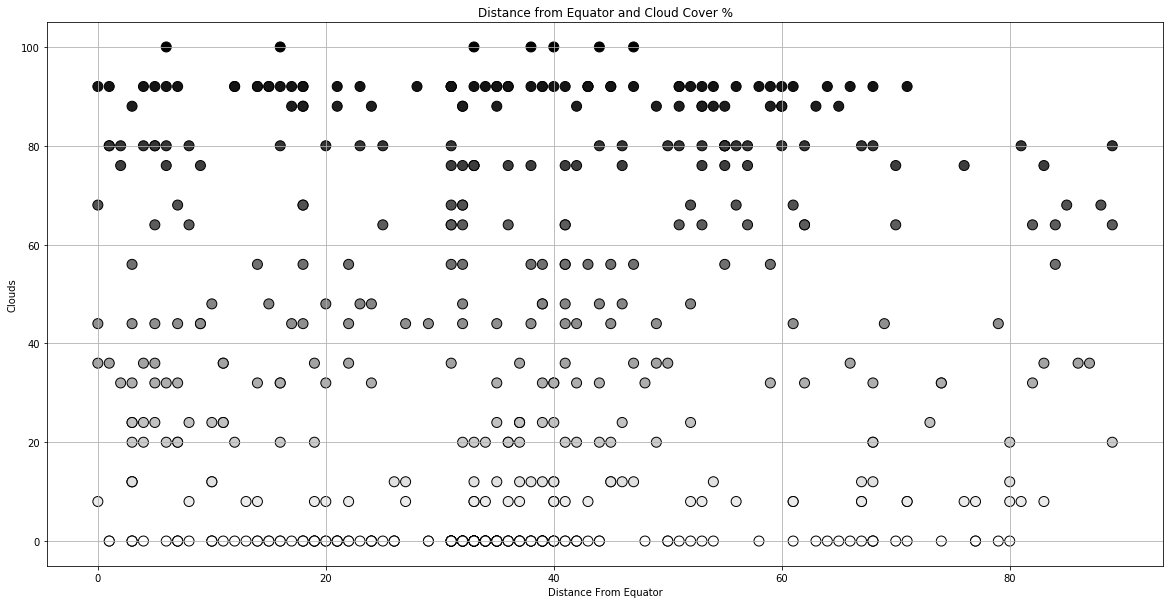

In [35]:
#Scatter plot for distance from Equator v. cloud cover. Again, I used a colormap to represent total coverage (covered black)
# versus no cloud coverage (transparent white)
locations.plot(kind="scatter", x="Distance From Equator", y="Clouds", grid=True, figsize=(20,10),
               title="Distance from Equator and Cloud Cover %",s=100, c="Clouds",
               cmap="gist_gray_r", colorbar=False, edgecolor="black")
plt.savefig('CloudCover.png')
plt.show()

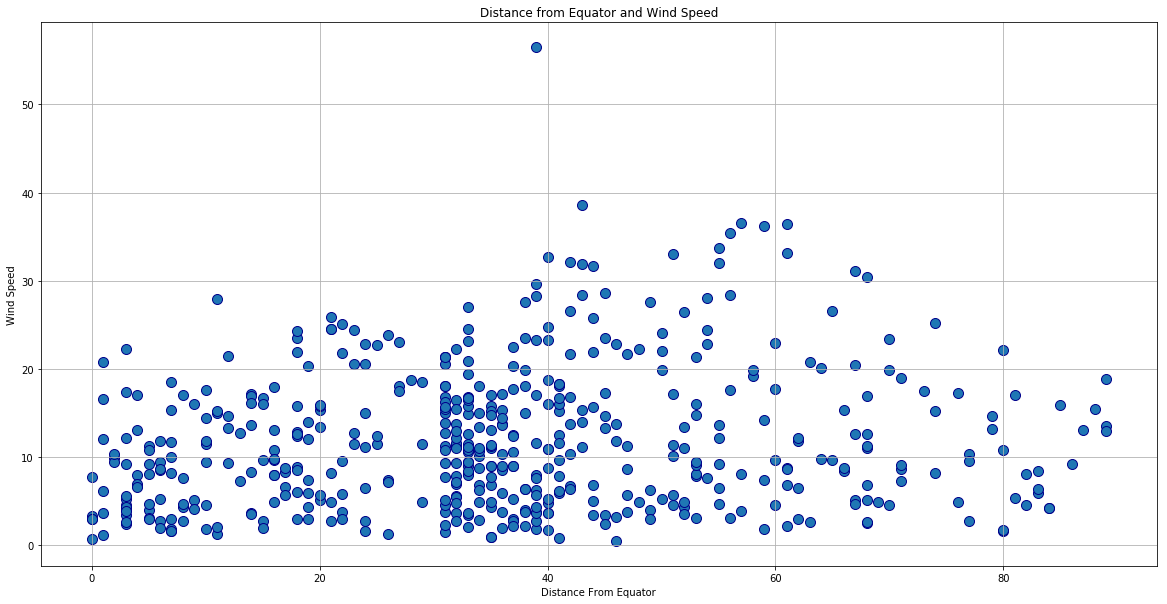

In [36]:
#Scatter plot distance from Equator v. wind speed
locations.plot(kind="scatter", x="Distance From Equator", y="Wind Speed", grid=True, figsize=(20,10),
              title="Distance from Equator and Wind Speed",s=100, edgecolor="darkblue")
plt.savefig('WindSpeed.png')
plt.show()

In [31]:
import plotly.plotly as py
import pandas as pd
import plotly
plotly.tools.set_credentials_file(username='ckarnas', api_key='cAAeEVu4vtfVzgkiW6tN')

df = pd.read_csv('EquatorDataResults.csv')

scl = [50,"rgb(150,0,90)"],[60,"rgb(14,154,34)"],[95,"rgb(255, 111, 0)"]

data = [ dict(
    lat = df['latitude'],
    lon = df['longitude'],
    #text = df['Globvalue'].astype(str) + ' inches',
    marker = dict(
        color = df['Noon Temp(f)'],
        colorscale = scl,
        #reversescale = True,
        opacity = 0.7,
        size = 14,
        colorbar = dict(
            thickness = 10,
            titleside = "right",
            #outlinecolor = "rgba(68, 68, 68, 0)",
            #ticks = "outside",
            #ticklen = 3,
            #showticksuffix = "last",
            #ticksuffix = " inches",
            #dtick = 0.1
        ),
    ),
    type = 'scattergeo'
) ]
# layout = dict(
#     title = 'World Temperature vs Equator location 03-26-2018<br>Source: Open Weather API',
#     geo = dict(
        
#         showframe = False,
#         showcoastlines = False,
#         projection = dict(
#             type = 'Mercator'
#         )
#     )
# )
layout = dict(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        
        projection=dict(type="Mercator"),
#         projection = dict(
#             type = 'conic conformal',
#             rotation = dict(
#                 lon = -100
#             )
#         ),
#         lonaxis = dict(
#             showgrid = True,
#             gridwidth = 1,
#             #range= [ -140.0, -55.0 ],
#             dtick = 5
#         ),
#          lataxis = dict (
#              showgrid = True,
#              gridwidth = 1,
#              #range= [ 20.0, 60.0 ],
#              dtick = 5
#         )
     ),
    title = 'World Temperature vs Equator location 03-26-2018<br>Source: Open Weather API',
)
fig = { 'data':data, 'layout':layout }
py.iplot(fig, filename='Equator Temperature Interaction')


In [32]:
py.image.save_as(fig, filename='Equator Temperature Interaction.png')